# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

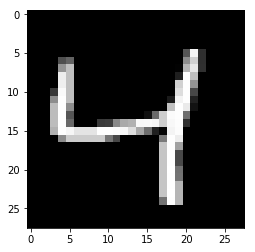

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation

encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6936
Epoch: 1/20... Training loss: 0.6902
Epoch: 1/20... Training loss: 0.6870
Epoch: 1/20... Training loss: 0.6830
Epoch: 1/20... Training loss: 0.6787
Epoch: 1/20... Training loss: 0.6735
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6585
Epoch: 1/20... Training loss: 0.6489
Epoch: 1/20... Training loss: 0.6376
Epoch: 1/20... Training loss: 0.6261
Epoch: 1/20... Training loss: 0.6128
Epoch: 1/20... Training loss: 0.5973
Epoch: 1/20... Training loss: 0.5833
Epoch: 1/20... Training loss: 0.5673
Epoch: 1/20... Training loss: 0.5482
Epoch: 1/20... Training loss: 0.5279
Epoch: 1/20... Training loss: 0.5100
Epoch: 1/20... Training loss: 0.4911
Epoch: 1/20... Training loss: 0.4731
Epoch: 1/20... Training loss: 0.4538
Epoch: 1/20... Training loss: 0.4398
Epoch: 1/20... Training loss: 0.4235
Epoch: 1/20... Training loss: 0.4098
Epoch: 1/20... Training loss: 0.3936
Epoch: 1/20... Training loss: 0.3797
Epoch: 1/20... Training loss: 0.3732
E

Epoch: 1/20... Training loss: 0.2067
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1989
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1941
E

Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1657
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1632
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1554
E

Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1435
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1364
E

Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1243
E

Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1114
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1168
E

Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1047
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1108
E

Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1051
E

Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1048
E

Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1033
E

Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1032
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0966
E

Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0913
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.1013
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0955
E

Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0999
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0901
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0901
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0890
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0887
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0899
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0881
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0994
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0882
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

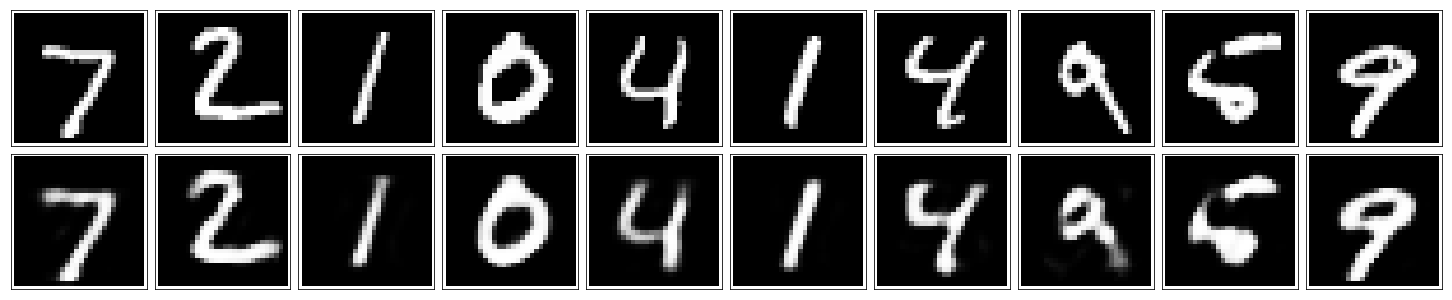

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.